# 📊 Test Exploratory Data Analysis — Social Media Sentiment Insights

**Objective:**  
Understand the dataset structure, detect missing values, explore distributions and early patterns to guide future modeling or insights presentation.

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visual settings
pd.set_option("display.max_colwidth", 120)
plt.style.use("default")

print("✅ Libraries loaded correctly.")

✅ Libraries loaded correctly.


## 📥 1. Load Dataset & Initial Overview

We'll load the dataset and quickly explore its structure to understand the number of rows, columns, and get a glimpse of the data.

In [3]:
# Load dataset
df = pd.read_csv("../data/sentimentdataset.csv")
print("✅ Dataset loaded. Shape:", df.shape)

# Quick peek
df.head(30)

✅ Dataset loaded. Shape: (732, 15)


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
5,5,5,Feeling grateful for the little things in life.,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
6,6,6,Rainy days call for cozy blankets and hot cocoa.,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
7,7,7,The new movie release is a must-watch!,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
8,8,8,Political discussions heating up on the timeline.,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
9,9,9,Missing summer vibes and beach days.,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                   Text    Sentiment  \
0   Enjoying a beautiful day at the park!                 Positive     
1   Traffic was terrible this morning.                    Negative     
2    Just finished an amazing workout! 💪                  Positive     
3   Excited about the upcoming weekend getaway!           Positive     
4   Trying out a new recipe for dinner tonight.           Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Re

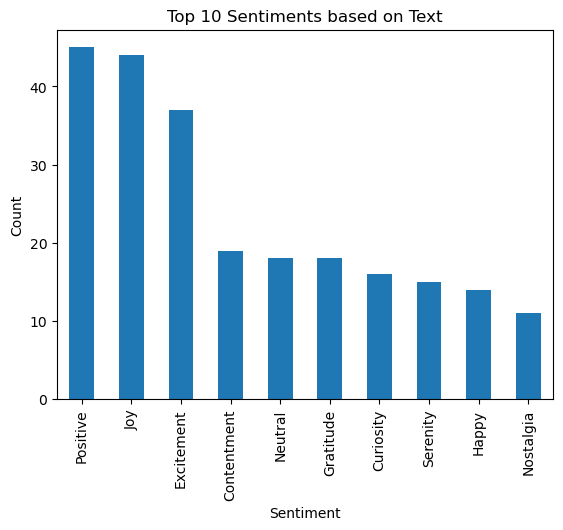

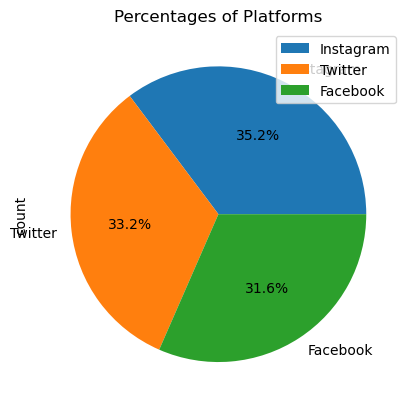

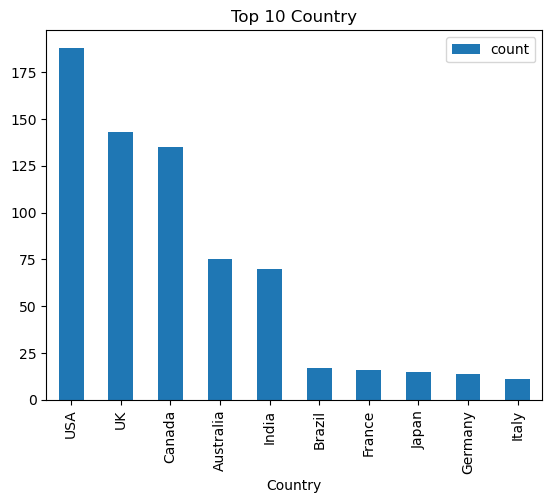

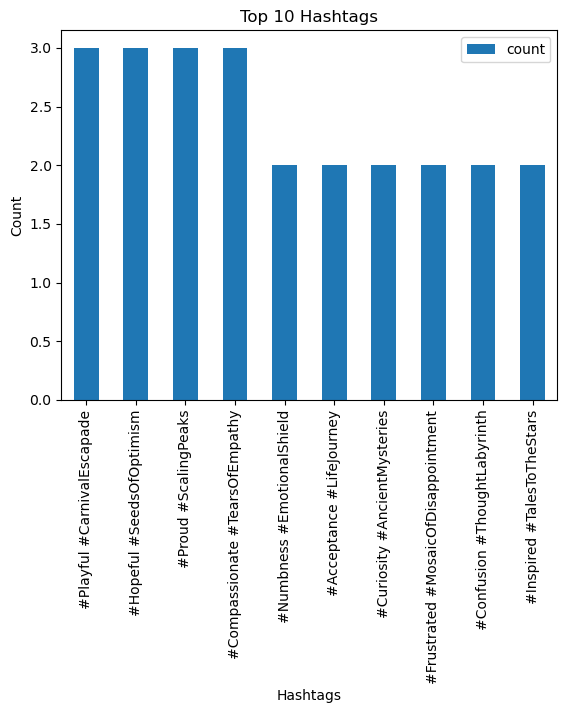

Minimum Day: 1 | Maximum Day: 31
Minimum Month: 1 | Maximum Month: 12
Minimum Year: 2010 | Maximum Year: 2023
Minimum Likes: 10.0 | Maximum Likes: 80.0
Minimum Retweets: 5.0 | Maximum Retweets: 40.0


In [4]:
print(df.head())
print(df.shape)

df.drop(columns='Unnamed: 0.1', inplace=True)
df.rename(columns={'Unnamed: 0':'Id'}, inplace=True)
df.isnull().sum()
df.dtypes
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

df['Text']= df['Text'].str.strip()
df['Sentiment']= df['Sentiment'].str.strip()
df['User']= df['User'].str.strip()
df['Platform']= df['Platform'].str.strip()
df['Hashtags']= df['Hashtags'].str.strip()
df['Country']= df['Country'].str.strip()
#EDA
df.head(1)

df['Sentiment'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Sentiments based on Text')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

df['Platform'].value_counts()

df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

df['Country'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Country')
plt.legend()
plt.show()

df['Hashtags'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend()
plt.show()

# Descrip data nurimucal
df.describe()

numerical_columns = df[['Day', 'Month', 'Year', 'Likes', 'Retweets']]

for col in numerical_columns.columns:
    print(f"Minimum {col}: {df[col].min()} | Maximum {col}: {df[col].max()}")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Id         732 non-null    int64         
 1   Text       732 non-null    object        
 2   Sentiment  732 non-null    object        
 3   Timestamp  732 non-null    datetime64[ns]
 4   User       732 non-null    object        
 5   Platform   732 non-null    object        
 6   Hashtags   732 non-null    object        
 7   Retweets   732 non-null    float64       
 8   Likes      732 non-null    float64       
 9   Country    732 non-null    object        
 10  Year       732 non-null    int32         
 11  Month      732 non-null    int32         
 12  Day        732 non-null    int32         
 13  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2), object(6)
memory usage: 71.6+ KB


In [6]:
df.describe()

,Id,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,369.740437,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,0.000000,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,185.750000,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,370.500000,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,553.250000,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,736.000000,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,212.428936,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [7]:
df.isnull().sum()

Id           0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [8]:
df.nunique()

Id           732
Text         706
Sentiment    191
Timestamp    683
User         670
Platform       3
Hashtags     692
Retweets      26
Likes         38
Country       33
Year          14
Month         12
Day           31
Hour          22
dtype: int64

In [9]:
df.sort_values(by="Likes", ascending=False).head(10)

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
481,486,"Surrounded by the colors of joy, a canvas painted with laughter and endless smiles.",Joy,2019-07-02 17:00:00,ColorfulLaughter,Instagram,#Joy #EndlessSmiles,40.0,80.0,Canada,2019,7,2,17
530,535,"Captivated by the spellbinding plot twists, the audience applauds, experiencing a rollercoaster of emotions at the m...",Excitement,2018-10-12 20:00:00,MovieEnthusiastPremiereAttendee,Twitter,#Excitement #MoviePremiereThrills,40.0,80.0,USA,2018,10,12,20
382,387,A sense of wonder at the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.0,80.0,South Africa,2018,7,8,23
560,565,"In the serene beauty of a sunset, nature unfolds a canvas of colors, evoking a sense of tranquility and wonder.",Tranquility,2021-07-10 19:00:00,NatureEnthusiastSunsetWonder,Instagram,#Tranquility #SunsetBeauty,40.0,80.0,Canada,2021,7,10,19
470,475,"Dancing on sunshine, each step a celebration of the joy found in simple moments.",Joy,2021-08-20 15:45:00,SunshineDancer,Instagram,#Joy #SimpleMoments,40.0,80.0,USA,2021,8,20,15
550,555,"After a series of defeats, the soccer team faces disappointment, struggling to find the silver lining in a challengi...",Disappointment,2019-11-02 18:45:00,SoccerFanTeamDefeats,Twitter,#Disappointment #SoccerDefeats,40.0,80.0,Brazil,2019,11,2,18
368,373,Elation over discovering a rare book in a quaint bookstore.,Elation,2018-09-22 16:30:00,Bookworm,Instagram,#Elation #RareBookDiscovery,40.0,80.0,USA,2018,9,22,16
540,545,"Celebrating a historic victory in the World Cup, the nation erupts in joy, united by the triumph of their football t...",Joy,2018-07-15 21:30:00,FootballFanWorldCupCelebration,Instagram,#Joy #WorldCupTriumph,40.0,80.0,Brazil,2018,7,15,21
355,360,Anticipation for an upcoming adventure in an exotic destination.,Anticipation,2022-07-25 10:00:00,Wanderlust,Twitter,#Anticipation #AdventureAwaits,40.0,80.0,India,2022,7,25,10
570,575,"Underneath the city lights, the dancer expresses emotions through graceful movements, creating a mesmerizing perform...",Mesmerizing,2018-06-15 22:00:00,DanceEnthusiastCityNightPerformance,Twitter,#Mesmerizing #NightDancePerformance,40.0,80.0,USA,2018,6,15,22


In [10]:
df.sort_values(by="Retweets", ascending=False).head(10)

,Id,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
570,575,"Underneath the city lights, the dancer expresses emotions through graceful movements, creating a mesmerizing perform...",Mesmerizing,2018-06-15 22:00:00,DanceEnthusiastCityNightPerformance,Twitter,#Mesmerizing #NightDancePerformance,40.0,80.0,USA,2018,6,15,22
470,475,"Dancing on sunshine, each step a celebration of the joy found in simple moments.",Joy,2021-08-20 15:45:00,SunshineDancer,Instagram,#Joy #SimpleMoments,40.0,80.0,USA,2021,8,20,15
368,373,Elation over discovering a rare book in a quaint bookstore.,Elation,2018-09-22 16:30:00,Bookworm,Instagram,#Elation #RareBookDiscovery,40.0,80.0,USA,2018,9,22,16
540,545,"Celebrating a historic victory in the World Cup, the nation erupts in joy, united by the triumph of their football t...",Joy,2018-07-15 21:30:00,FootballFanWorldCupCelebration,Instagram,#Joy #WorldCupTriumph,40.0,80.0,Brazil,2018,7,15,21
560,565,"In the serene beauty of a sunset, nature unfolds a canvas of colors, evoking a sense of tranquility and wonder.",Tranquility,2021-07-10 19:00:00,NatureEnthusiastSunsetWonder,Instagram,#Tranquility #SunsetBeauty,40.0,80.0,Canada,2021,7,10,19
355,360,Anticipation for an upcoming adventure in an exotic destination.,Anticipation,2022-07-25 10:00:00,Wanderlust,Twitter,#Anticipation #AdventureAwaits,40.0,80.0,India,2022,7,25,10
402,407,Awe-inspired by the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.0,80.0,South Africa,2018,7,8,23
530,535,"Captivated by the spellbinding plot twists, the audience applauds, experiencing a rollercoaster of emotions at the m...",Excitement,2018-10-12 20:00:00,MovieEnthusiastPremiereAttendee,Twitter,#Excitement #MoviePremiereThrills,40.0,80.0,USA,2018,10,12,20
382,387,A sense of wonder at the vastness of the cosmos on a stargazing night.,Wonder,2018-07-08 23:00:00,CosmosExplorer,Instagram,#Wonder #StargazingAdventure,40.0,80.0,South Africa,2018,7,8,23
432,437,"Heartache deepens, a solitary journey through the abyss of despair.",Despair,2022-08-18 22:00:00,SolitaryDescent,Instagram,#Despair #AbyssOfHeartache,40.0,80.0,South Africa,2022,8,18,22


In [11]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_corr = df.corr(numeric_only=True).round(2)
df_corr.style.format("{:.2f}").background_gradient(cmap="coolwarm")
# df.corr(numeric_only=True)

,Id,Retweets,Likes,Year,Month,Day,Hour
Id,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Retweets,0.39,1.00,1.00,-0.04,0.07,0.01,0.20
Likes,0.38,1.00,1.00,-0.04,0.07,0.01,0.20
Year,0.10,-0.04,-0.04,1.00,-0.31,0.02,-0.09
Month,0.44,0.07,0.07,-0.31,1.00,-0.14,0.14
Day,-0.08,0.01,0.01,0.02,-0.14,1.00,0.04
Hour,0.32,0.20,0.20,-0.09,0.14,0.04,1.00


Unnamed data should be removed
Total correlation between likes and retweets

In [12]:
df_corr = df.corr(numeric_only=True).round(2)
df_corr.style.format("{:.2f}").background_gradient(cmap="magma")

,Id,Retweets,Likes,Year,Month,Day,Hour
Id,1.00,0.39,0.38,0.10,0.44,-0.08,0.32
Retweets,0.39,1.00,1.00,-0.04,0.07,0.01,0.20
Likes,0.38,1.00,1.00,-0.04,0.07,0.01,0.20
Year,0.10,-0.04,-0.04,1.00,-0.31,0.02,-0.09
Month,0.44,0.07,0.07,-0.31,1.00,-0.14,0.14
Day,-0.08,0.01,0.01,0.02,-0.14,1.00,0.04
Hour,0.32,0.20,0.20,-0.09,0.14,0.04,1.00


When applying a background gradient, especially in data visualization libraries like Pandas or Matplotlib, the cmap argument (colormap) specifies the color scheme to be used. While coolwarm provides a diverging colormap ranging from cool blues to warm reds, many other options exist, each with a distinct aesthetic and purpose.
Here are some categories of colormaps and examples of other colors you could use:
1. Sequential Colormaps: These colormaps are designed to show a progression of values, typically from low to high, using a single hue or a gradual change in lightness/saturation.
Examples: viridis, plasma, inferno, magma, gray, Blues, Greens, Reds, Purples, Oranges.
2. Diverging Colormaps: Similar to coolwarm, these colormaps emphasize a central neutral value and diverge to two distinct colors at the extremes, suitable for showing deviations from a mean or a zero point.
Examples: seismic, RdBu, PiYG, PRGn, BrBG, bwr.
3. Qualitative Colormaps: These colormaps are designed to distinguish between discrete categories or groups, using distinct and easily differentiable colors.
Examples: tab10, tab20, Paired, Set1, Set2, Dark2.
4. Cyclic Colormaps: These colormaps are useful for data that wraps around a central point, like angles or phases, where the start and end colors are the same or very similar.
Examples: twilight, hsv.
To choose the best colormap, consider:
Data Type: Is your data sequential, diverging, or categorical?
Clarity: Does the colormap effectively convey the information without causing misinterpretations?
Accessibility: Is the colormap colorblind-friendly? (e.g., viridis is often recommended for this).
Aesthetics: Does the colormap align with the overall design and purpose of your visualization?

In [13]:
df['text_len'] = df['Text'].str.len()
df['word_count'] = df['Text'].str.split().str.len()
df['hashtag_count'] = df['Hashtags'].str.count('#')
df['emoji_count'] = df['Text'].str.count(r'[^\w\s,]')  # emojis/símbolos

df[['text_len', 'word_count', 'hashtag_count', 'emoji_count', 'Likes', 'Retweets']].corr()

,text_len,word_count,hashtag_count,emoji_count,Likes,Retweets
text_len,1.000000,0.948347,NaN,0.356918,0.200187,0.202392
word_count,0.948347,1.000000,NaN,0.261845,0.196229,0.197125
hashtag_count,NaN,NaN,NaN,NaN,NaN,NaN
emoji_count,0.356918,0.261845,NaN,1.000000,0.174394,0.181458
Likes,0.200187,0.196229,NaN,0.174394,1.000000,0.998482
Retweets,0.202392,0.197125,NaN,0.181458,0.998482,1.000000


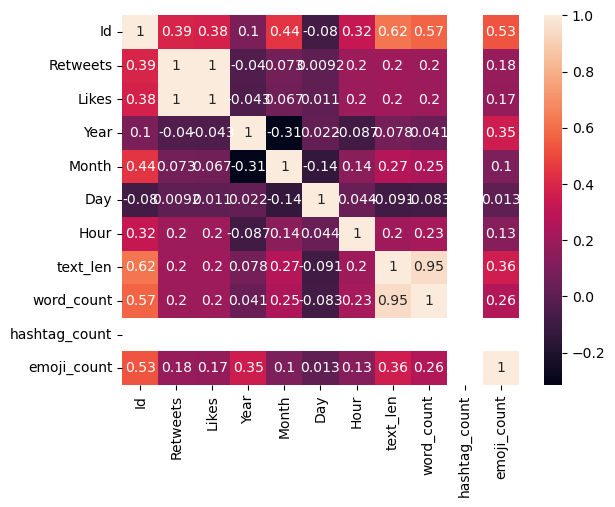

In [14]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

plt.rcParams['figure.figsize'] = (20,7)

plt.show()

In [15]:
df_groupby = df.groupby('Platform')[['Likes', 'Retweets']].mean().sort_values(by='Likes', ascending=False)
df_groupby.style.format("{:.1f}")

,Likes,Retweets
Platform,,
Instagram,45.1,22.6
Facebook,41.9,21.0
Twitter,41.6,20.9


In [16]:
df['Country'].value_counts()


Country
USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway              1
Cambodia            1
Maldives            1
Peru                1
Jordan              1
Thailand            1
Name: count, dtype: int64

Strings might have empty values and that messes up de 'country' data

In [17]:
df['Country'].value_counts(normalize=True) * 100

Country
USA               25.683060
UK                19.535519
Canada            18.442623
Australia         10.245902
India              9.562842
Brazil             2.322404
France             2.185792
Japan              2.049180
Germany            1.912568
Italy              1.502732
Spain              0.819672
South Africa       0.819672
Greece             0.683060
Netherlands        0.546448
Switzerland        0.409836
Portugal           0.273224
Austria            0.273224
Belgium            0.273224
Denmark            0.273224
Czech Republic     0.273224
Sweden             0.273224
Colombia           0.136612
Scotland           0.136612
Kenya              0.136612
Jamaica            0.136612
Ireland            0.136612
China              0.136612
Norway             0.136612
Cambodia           0.136612
Maldives           0.136612
Peru               0.136612
Jordan             0.136612
Thailand           0.136612
Name: proportion, dtype: float64

In [18]:
df.groupby('Country')[['Likes', 'Retweets', 'emoji_count', 'word_count']].mean().sort_values(by='Likes', ascending=False)

,Likes,Retweets,emoji_count,word_count
Country,,,,
South Africa,71.666667,35.833333,1.166667,12.833333
Belgium,70.000000,35.000000,1.000000,10.500000
Thailand,70.000000,35.000000,1.000000,21.000000
Sweden,70.000000,35.000000,1.000000,10.000000
Jamaica,60.000000,30.000000,3.000000,17.000000
Jordan,60.000000,30.000000,1.000000,15.000000
Portugal,55.000000,28.000000,1.000000,11.000000
Switzerland,55.000000,27.333333,1.333333,14.666667
Colombia,55.000000,28.000000,5.000000,15.000000


In [19]:
df_groupby = df.groupby('Sentiment')[['Likes', 'Retweets']].mean().sort_values(by='Retweets', ascending=False)
df_groupby.style.format("{:.1f}")

,Likes,Retweets
Sentiment,,
Mesmerizing,80.0,40.0
Motivation,80.0,40.0
Wonder,73.3,36.7
Whispers of the Past,70.0,35.0
Suspense,70.0,35.0
Imagination,70.0,35.0
Challenge,70.0,35.0
InnerJourney,70.0,35.0
Resilience,70.0,35.0
